In [49]:
# Import Packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Data Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
### read in data

beer_dat = pd.read_csv(r"C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\data\raw\beer_reviews.csv")

In [3]:
beer_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [4]:
# Divide up data
num_cols = ['review_aroma','review_appearance','review_palate','review_taste']

cat_cols = ['brewery_id']
y_cat_cols = ['beer_style']
key_feat = ['brewery_id','review_aroma','review_appearance','review_palate','review_taste','beer_style']

df_cleaned = beer_dat[key_feat]

In [5]:
#Instantiate SC
sc = StandardScaler()
#Scale numerics
df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])


#scale Cat
X_cat = df_cleaned[cat_cols].astype('category')
df_cleaned.drop(cat_cols, axis=1, inplace=True)
ode = OrdinalEncoder()
X_cat_y = pd.DataFrame(ode.fit_transform(df_cleaned[y_cat_cols]))
X_cat_y.columns = y_cat_cols
X_cat_y = X_cat_y.astype(int)
df_cleaned.drop(y_cat_cols, axis=1, inplace=True)
X_cat_cols = pd.concat([X_cat, X_cat_y ], axis=1)

#recombine as X
X = pd.concat([df_cleaned, X_cat_cols ], axis=1)

X = X.drop(columns=['brewery_id'])

<ipython-input-5-1a50bd7a9b68>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])
c:\users\angus\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\users\angus\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [6]:
X_cat_y.beer_style.unique()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   review_aroma       1586614 non-null  float64
 1   review_appearance  1586614 non-null  float64
 2   review_palate      1586614 non-null  float64
 3   review_taste       1586614 non-null  float64
 4   beer_style         1586614 non-null  int32  
dtypes: float64(4), int32(1)
memory usage: 54.5 MB


In [7]:
os.chdir(r"C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\src\data")
from sets import subset_x_y, split_sets_by_time, save_sets, split_sets_random
os.chdir(r"C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\notebooks")

In [8]:
# Solution
def pop_target(df, target_col, to_numpy=False):
    """Extract target variable from dataframe and convert to nympy arrays if required

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe
    target_col : str
        Name of the target variable
    to_numpy : bool
        Flag stating to convert to numpy array or not

    Returns
    -------
    pd.DataFrame/Numpy array
        Subsetted Pandas dataframe containing all features
    pd.DataFrame/Numpy array
        Subsetted Pandas dataframe containing the target
    """

    df_copy = df.copy()
    target = df_copy.pop(target_col)
    
    if to_numpy:
        df_copy = df_copy.to_numpy()
        target = target.to_numpy()
    
    return df_copy, target

# Solution
def split_sets_random(df, target_col, test_ratio=0.2, to_numpy=False):
    """Split sets randomly

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe
    target_col : str
        Name of the target column
    test_ratio : float
        Ratio used for the validation and testing sets (default: 0.2)

    Returns
    -------
    Numpy Array
        Features for the training set
    Numpy Array
        Target for the training set
    Numpy Array
        Features for the validation set
    Numpy Array
        Target for the validation set
    Numpy Array
        Features for the testing set
    Numpy Array
        Target for the testing set
    """
    
    from sklearn.model_selection import train_test_split
    
    features, target = pop_target(df=df, target_col=target_col, to_numpy=to_numpy)
    
    X_data, X_test, y_data, y_test = train_test_split(features, target, test_size=test_ratio, random_state=8)
    
    val_ratio = test_ratio / (1 - test_ratio)
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=val_ratio, random_state=8)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [9]:
### Train test split, change to numpy

X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(X, target_col='beer_style', test_ratio=0.2, to_numpy=True)

In [60]:
#y_train = np.array([y_train])
X_train.shape

(951968, 4)

In [11]:
save_sets(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, path='../data/processed/')

In [12]:
os.chdir(r"C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\src\models")
from pytorch import PytorchDataset
os.chdir(r"C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\notebooks")

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [14]:
# Generate Pytorch sets
train_dataset = PytorchDataset(X=X_train, y=y_train)
val_dataset = PytorchDataset(X=X_val, y=y_val)
test_dataset = PytorchDataset(X=X_test, y=y_test)

In [15]:
os.chdir(r"C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\src\models")
from null import NullModel
from performance import print_class_perf
from MClasspytorch import PytorchMultiClass, train_classification, test_classification
os.chdir(r"C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\notebooks")

In [16]:
# fit a baseline model for reference

baseline_model = NullModel(target_type='classification')
y_base = baseline_model.fit_predict(y_train)

#results
print_class_perf(y_base, y_train, set_name='Training', average='weighted')

Accuracy Training: 0.0742157299405022
F1 Training: 0.01025487603110527


In [31]:
def train_classification(train_data, model, criterion, optimizer, batch_size, device, scheduler=None, generate_batch=None):
    """Train a Pytorch multi-class classification model

    Parameters
    ----------
    train_data : torch.utils.data.Dataset
        Pytorch dataset
    model: torch.nn.Module
        Pytorch Model
    criterion: function
        Loss function
    optimizer: torch.optim
        Optimizer
    bacth_size : int
        Number of observations per batch
    device : str
        Name of the device used for the model
    scheduler : torch.optim.lr_scheduler
        Pytorch Scheduler used for updating learning rate
    collate_fn : function
        Function defining required pre-processing steps

    Returns
    -------
    Float
        Loss score
    Float:
        Accuracy Score
    """
  
    
    # Set model to training mode
    model.train()
    train_loss = 0
    train_acc = 0
    
    # Create data loader
    data = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=generate_batch)
    
    # Iterate through data by batch of observations
    for feature, target_class in data:

        # Reset gradients
        optimizer.zero_grad()
        
        # Load data to specified device
        feature, target_class = feature.to(device), target_class.to(device)
        
        # Make predictions
        output = model(feature)
        
        # Calculate loss for given batch
        loss = criterion(output, target_class.long())

        # Calculate global loss
        train_loss += loss.item()
        
        # Calculate gradients
        loss.backward()

        # Update Weights
        optimizer.step()
        
        # Calculate global accuracy
        train_acc += (output.argmax(1) == target_class).sum().item()

    # Adjust the learning rate
    if scheduler:
        scheduler.step()

  
    return train_loss / len(train_data), train_acc / len(train_data)

In [25]:
def test_classification(test_data, model, criterion, batch_size, device, generate_batch=None):
    """Calculate performance of a Pytorch multi-class classification model

    Parameters
    ----------
    test_data : torch.utils.data.Dataset
        Pytorch dataset
    model: torch.nn.Module
        Pytorch Model
    criterion: function
        Loss function
    bacth_size : int
        Number of observations per batch
    device : str
        Name of the device used for the model
    collate_fn : function
        Function defining required pre-processing steps

    Returns
    -------
    Float
        Loss score
    Float:
        Accuracy Score
    """    

    
    # Set model to evaluation mode
    model.eval()
    test_loss = 0
    test_acc = 0
    
    # Create data loader
    data = DataLoader(test_data, batch_size=batch_size, collate_fn=generate_batch)
    
    # Iterate through data by batch of observations
    for feature, target_class in data:
        
        # Load data to specified device
        feature, target_class = feature.to(device), target_class.to(device)
        
        # Set no update to gradients
        with torch.no_grad():
            
            # Make predictions
            output = model(feature)
            
            # Calculate loss for given batch
            loss = criterion(output, target_class.long())

            # Calculate global loss
            test_loss += loss.item()
            
            # Calculate global accuracy
            test_acc += (output.argmax(1) == target_class).sum().item()


    return test_loss / len(test_data), test_acc / len(test_data)

In [55]:
class PytorchMultiClass(nn.Module):
    def __init__(self, num_features):
        super(PytorchMultiClass, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 32)
        self.layer_2 = nn.Linear(32, 104)
        self.layer_3 = nn.Linear(104, 32)
        self.layer_out = nn.Linear(32, 104) #from 4, 104 number of classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.dropout(F.relu(self.layer_1(x)), training=self.training)
        x = F.dropout(F.relu(self.layer_2(x)), training=self.training)
        x = F.dropout(F.relu(self.layer_3(x)), training=self.training)
        x = self.layer_out(x)
        return self.softmax(x)

In [56]:
# Train Multiclass
model = PytorchMultiClass(X_train.shape[1])

#Set device no GPU
device = torch.device('cpu')

print(model)

PytorchMultiClass(
  (layer_1): Linear(in_features=4, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=104, bias=True)
  (layer_3): Linear(in_features=104, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=104, bias=True)
  (softmax): Softmax(dim=1)
)


In [57]:
# Set criterion
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()

# Set optimizer and Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [58]:
N_EPOCHS = 10
BATCH_SIZE = 32

In [59]:
#record file
tr_acchistory = []
tr_losshistory = []  
tstacchistory = []
tstlosshistory = []

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_classification(train_dataset, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_classification(val_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    tr_acchistory.append(train_acc)
    tr_losshistory.append(train_loss)  
    tstacchistory.append(valid_acc)
    tstlosshistory.append(valid_loss)
    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.1f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.1f}%')

Epoch: 0
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 1
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 2
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 3
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 4
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 5
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 6
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 7
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 8
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%
Epoch: 9
	(train)	|	Loss: 0.1433	|	Acc: 7.4%
	(valid)	|	Loss: 0.1433	|	Acc: 7.4%


In [ ]:
# Save model

#torch.save(model.state_dict(), r'C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\models\NN_4feat.pt')


In [50]:
def plot_losses(history):
    losses = pd.DataFrame(history)
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');
    
def plot_accuracies(history):
    accuracies = pd.DataFrame(history)
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

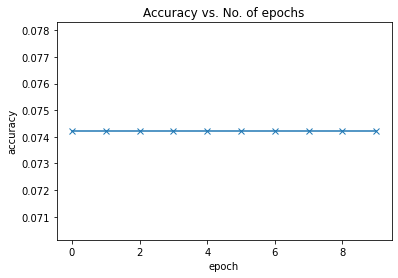

In [51]:
plot_accuracies(tr_acchistory)

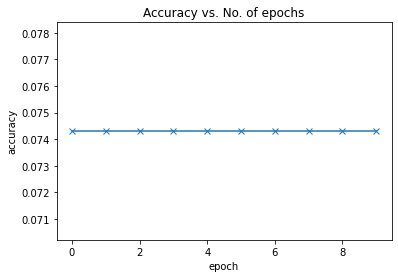

In [52]:
plot_accuracies(tstacchistory)

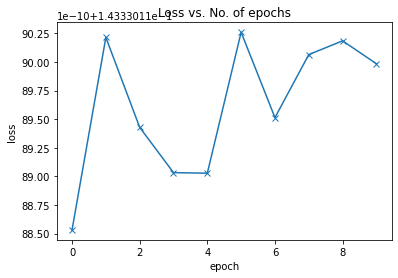

In [53]:
plot_losses(tr_losshistory)

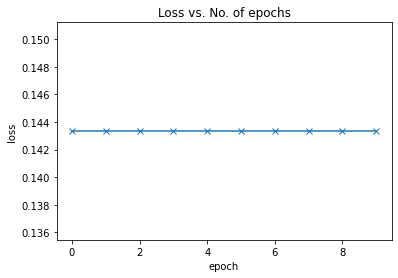

In [54]:
plot_losses(tstlosshistory)